In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', keep_default_na=False) #Reading the dataset

#Preprocessing the data
#Normal and Normal Weight are the same thing, so we will replace Normal Weight with Normal
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')

#We will categorize the blood pressure into three categories: Normal, Prehypertension and Hypertension
def categorize_bp(row):
    systolic, diastolic = map(int, row['Blood Pressure'].split('/'))
    if systolic >= 140 or diastolic >= 90:
        return 'Hypertension'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Prehypertension'
    else:
        return 'Normal'

data['Blood Pressure'] = data.apply(categorize_bp, axis=1)

data.head() #Checking the dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,Prehypertension,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,Prehypertension,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,Prehypertension,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,Hypertension,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,Hypertension,85,3000,Sleep Apnea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 3
Blood Pressure               3
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

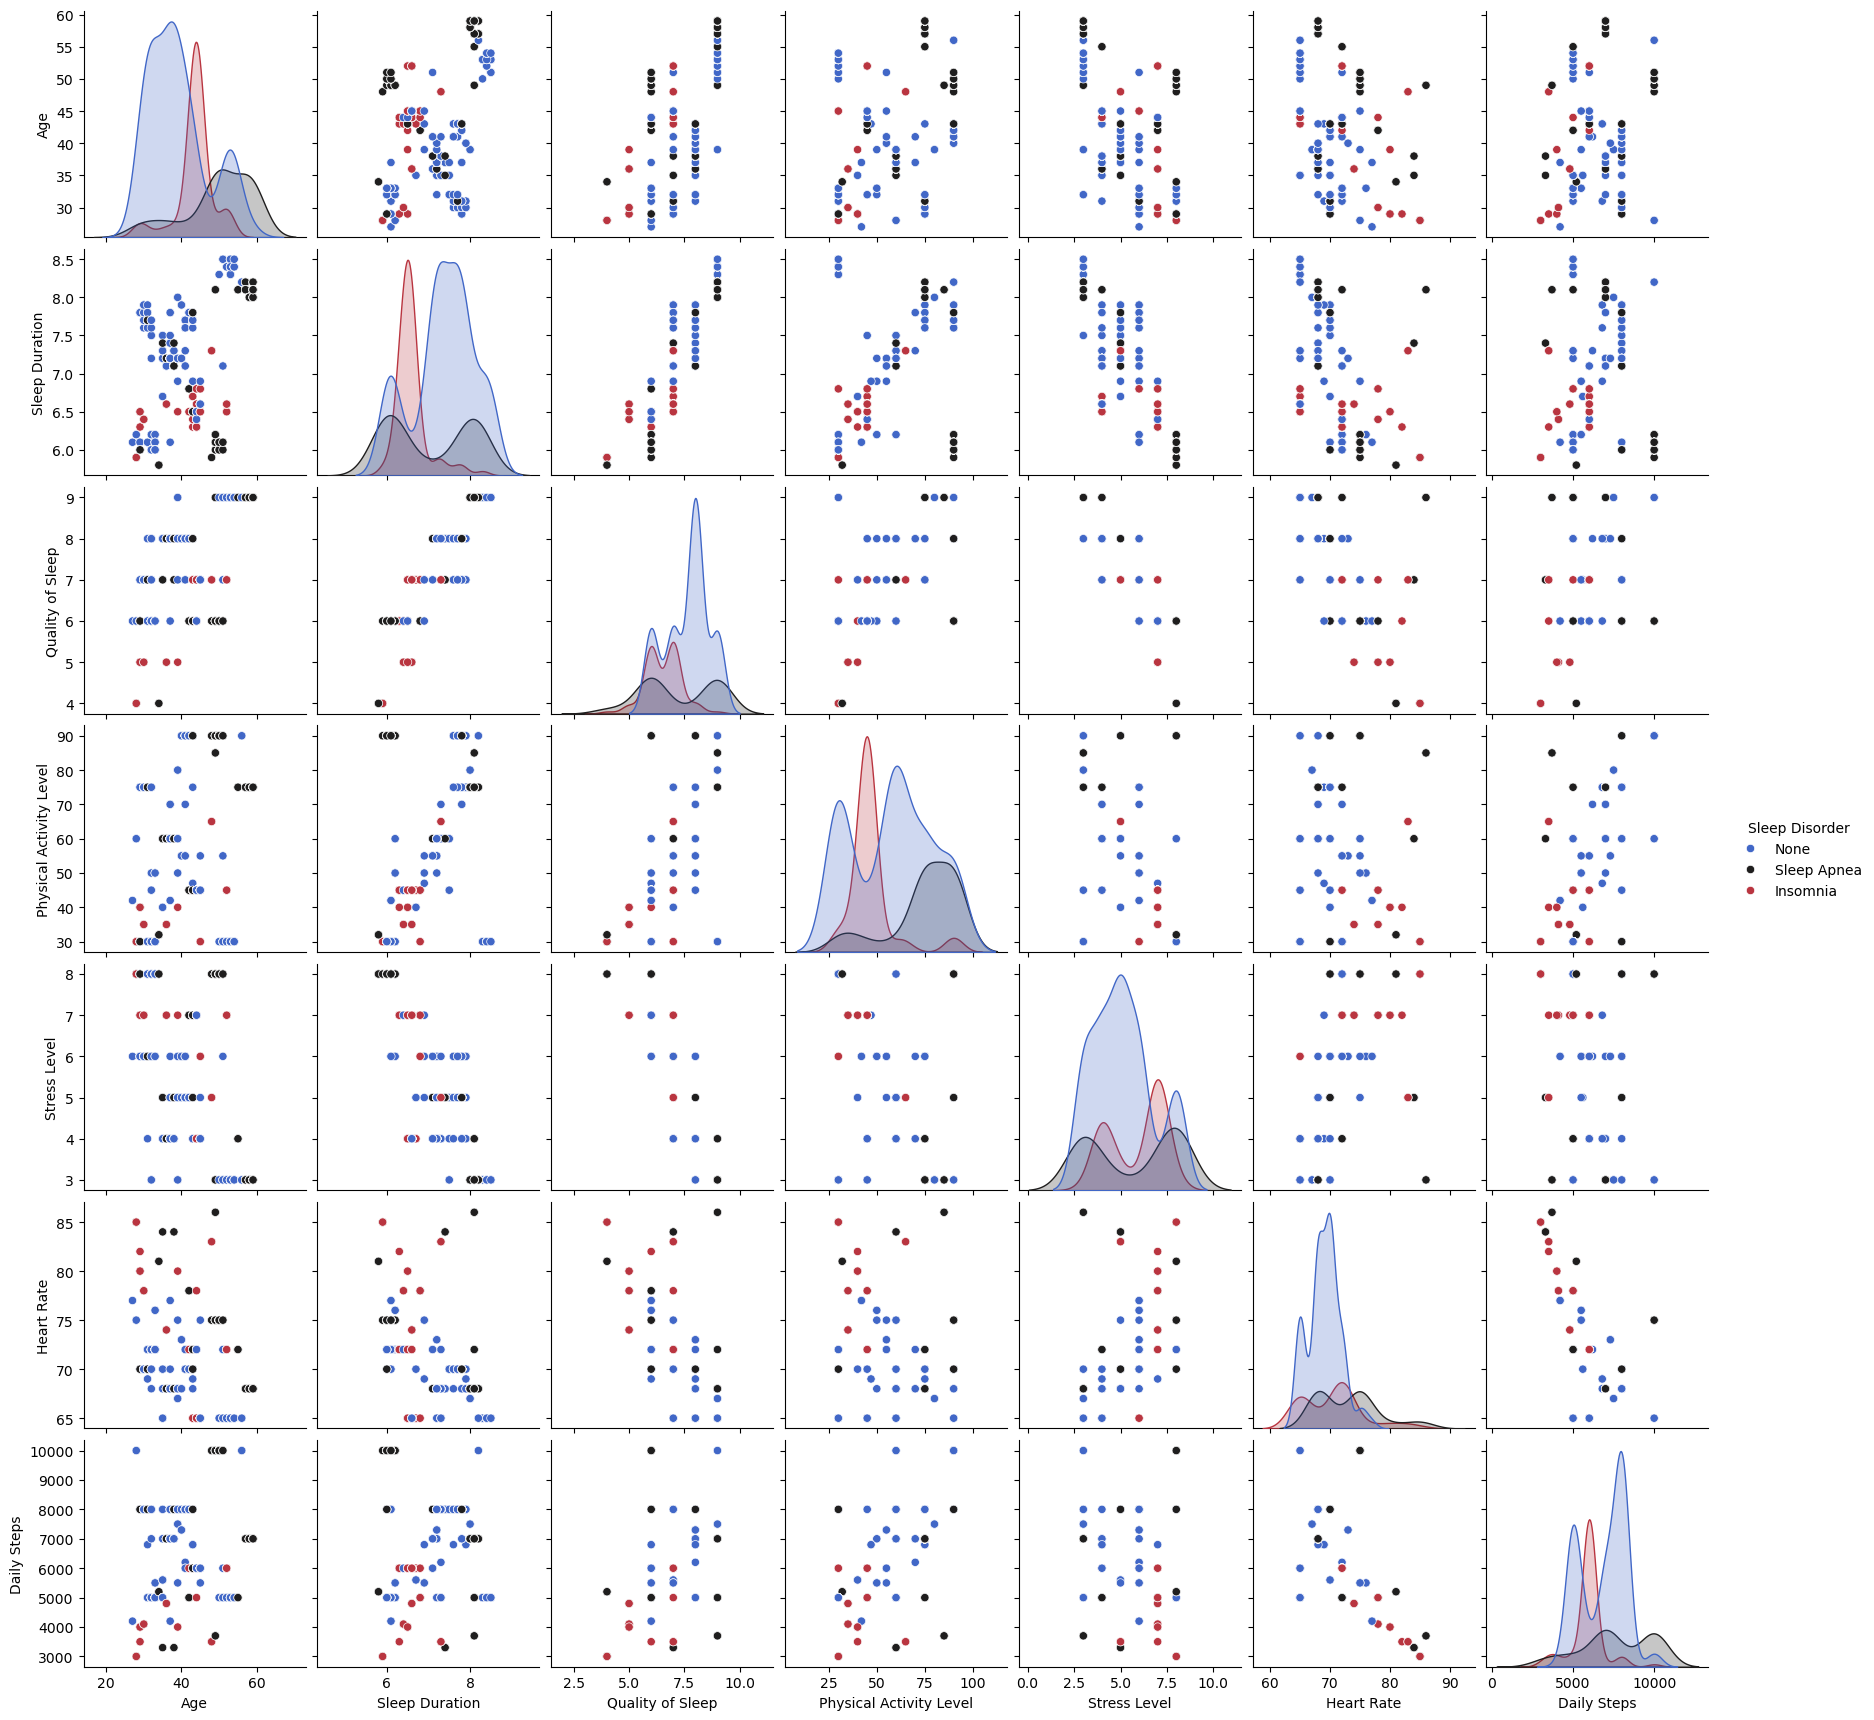

In [7]:
#Pairplot to see the relationship between the variables
sns.pairplot(data.drop('Person ID', axis=1), hue='Sleep Disorder', palette='icefire')

C:\Users\dohun\AppData\Local\Temp\ipykernel_40888\1319798014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Quality of Sleep', data=data, palette='icefire')


Text(0.5, 1.0, 'Boxplot of Gender and Quality of Sleep')

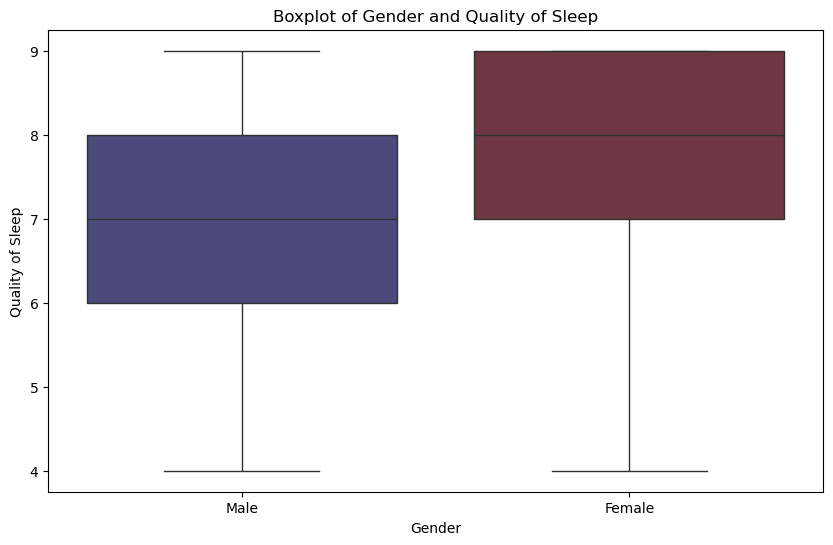

In [8]:
#Gender and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=data, palette='icefire')
plt.title('Boxplot of Gender and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Age and Quality of Sleep')

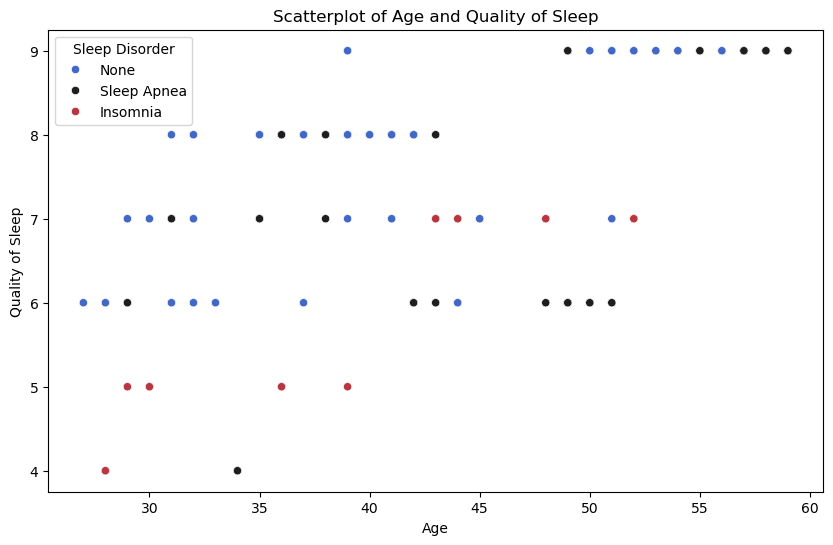

In [9]:
#Age and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Age and Quality of Sleep')

C:\Users\dohun\AppData\Local\Temp\ipykernel_40888\149463257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI Category', y='Quality of Sleep', data=data, palette='icefire')


Text(0.5, 1.0, 'Boxplot of BMI Category and Quality of Sleep')

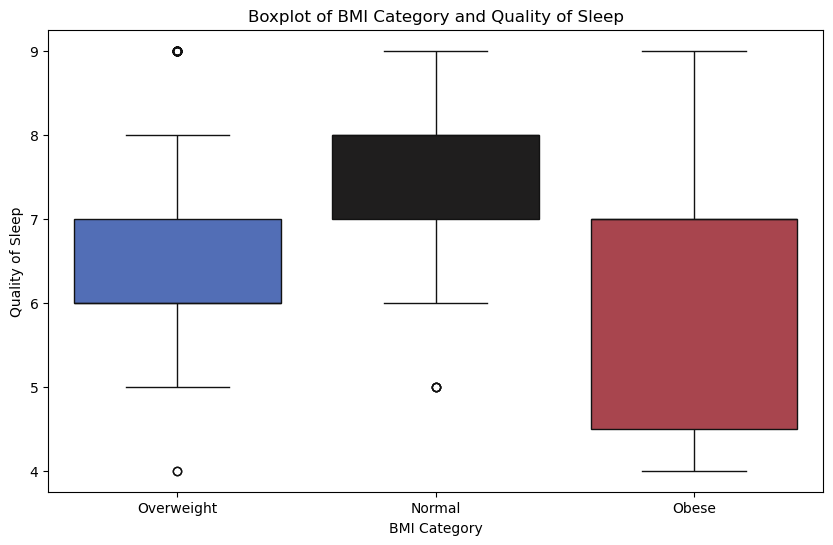

In [10]:
#BMI Category and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=data, palette='icefire')
plt.title('Boxplot of BMI Category and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Heart Rate and Quality of Sleep')

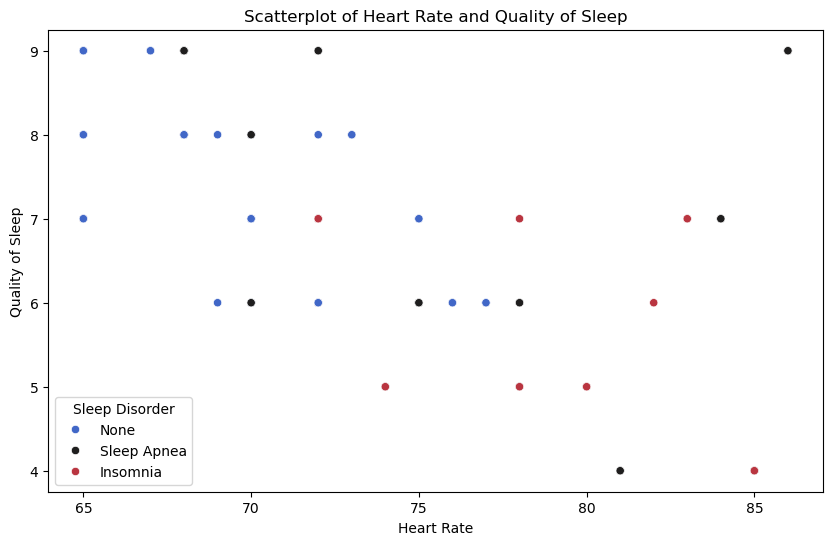

In [11]:
# Plot Heart Rate vs Quality of Sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Heart Rate and Quality of Sleep')

Text(0.5, 1.0, 'Boxplot of Blood Pressure Category and Quality of Sleep')

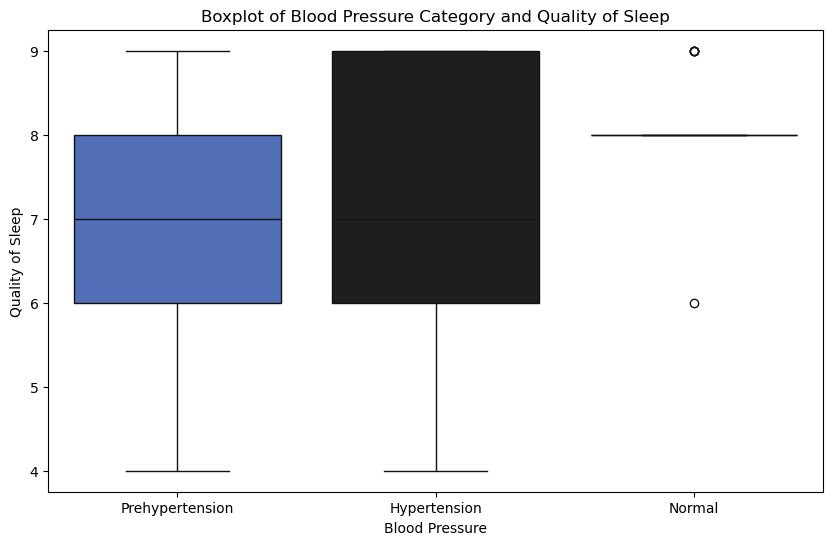

In [12]:
# Plot the categorized blood pressure with quality of sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blood Pressure', y='Quality of Sleep', data=data, palette='icefire', hue='Blood Pressure')
plt.title('Boxplot of Blood Pressure Category and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Physical Activity Level and Quality of Sleep')

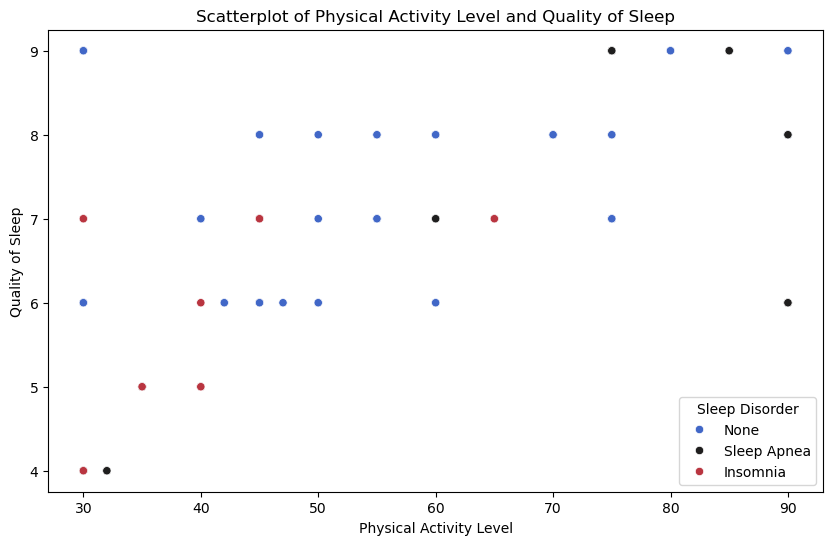

In [13]:
# Physical Activity Level and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Physical Activity Level and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Daily Steps and Quality of Sleep')

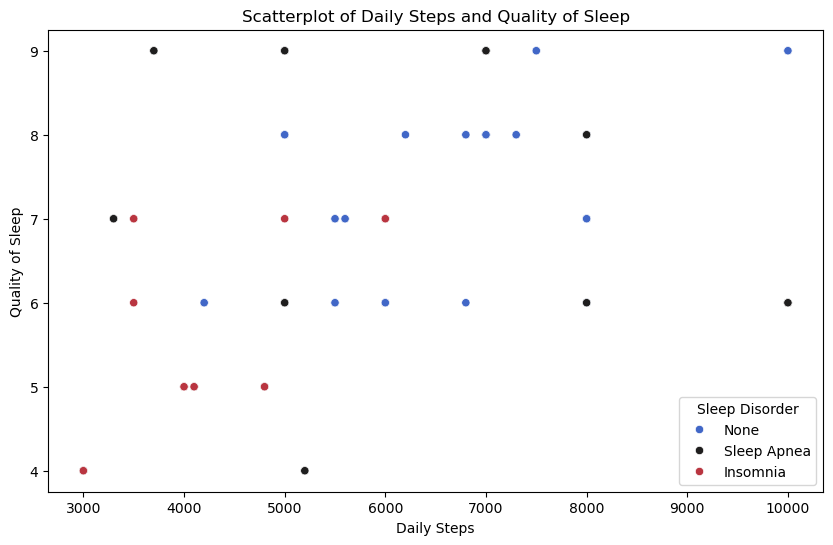

In [14]:
# Daily Steps and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Daily Steps and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Stress Level and Quality of Sleep')

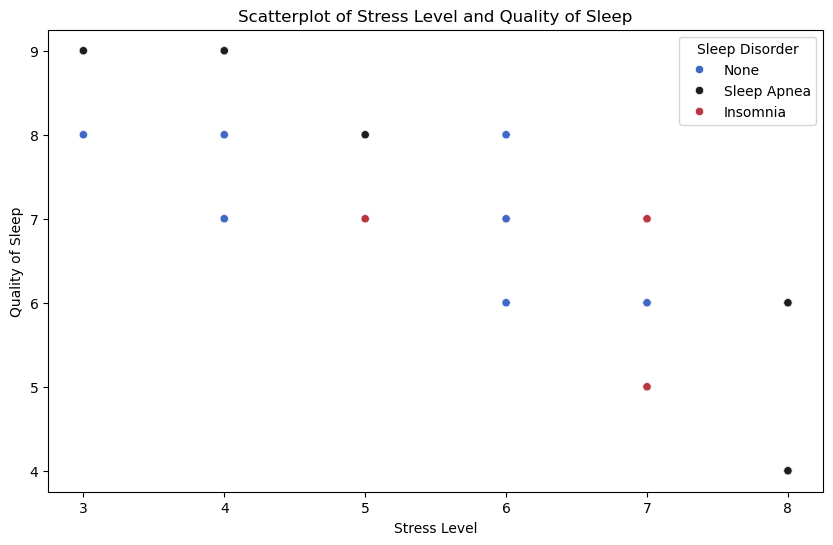

In [15]:
# Stress Level and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Stress Level and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Sleep Duration and Quality of Sleep')

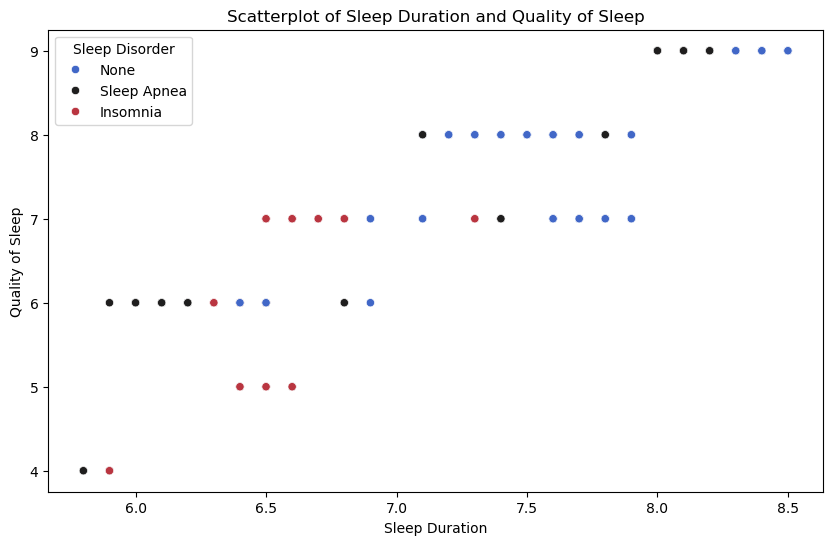

In [16]:
# Sleep Duration and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Sleep Duration and Quality of Sleep')

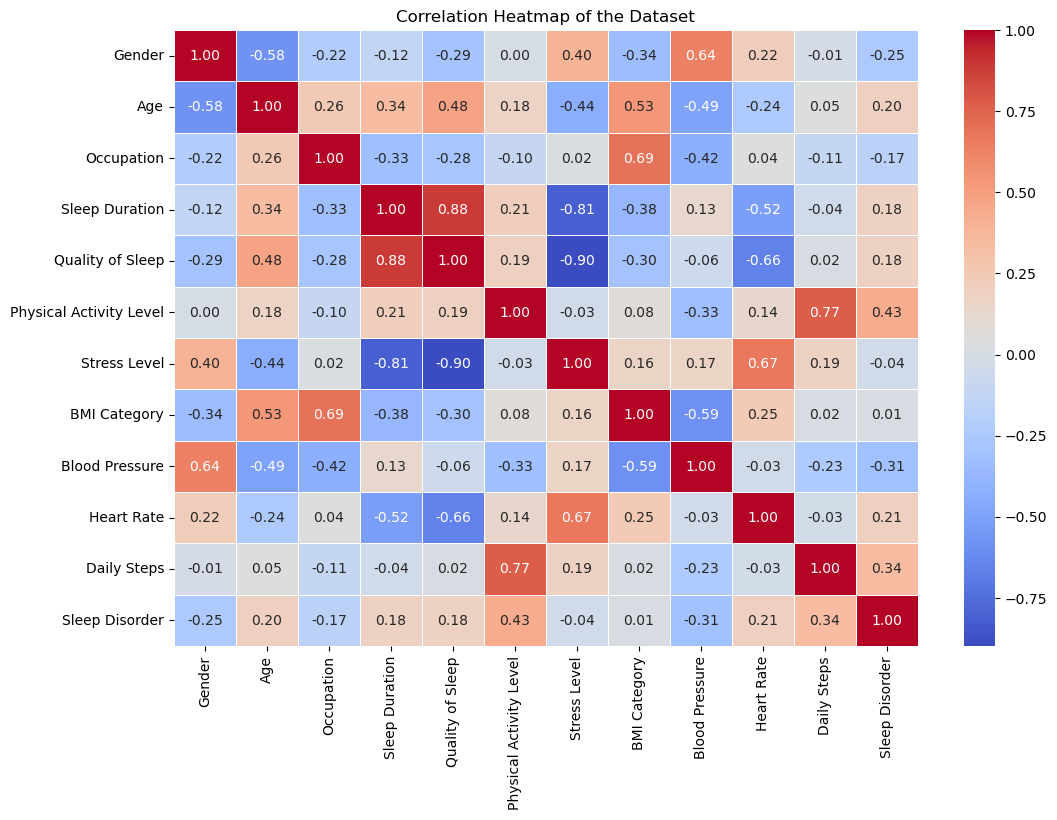

In [17]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()
categories=['Gender','Age','Occupation','BMI Category','Blood Pressure', 'Sleep Disorder']
for label in categories:
    data[label]=LE.fit_transform(data[label])

data.drop('Person ID', axis=1, inplace=True)

# Compute the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

Text(0.5, 1.0, 'Top 6 Correlation with Quality of Sleep')

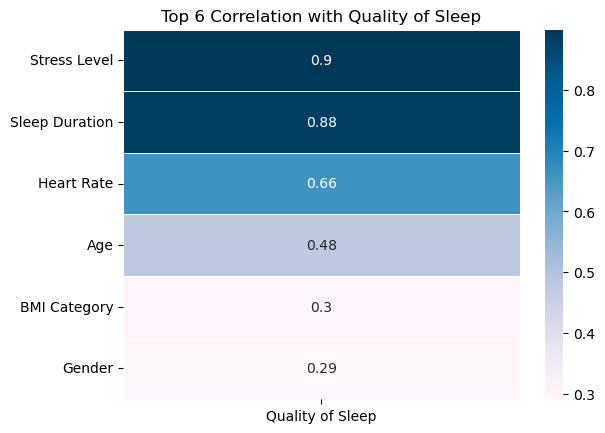

In [18]:
corr = data.corr()
corr = corr.drop('Quality of Sleep', axis=0)
max_6_corr = corr.abs().nlargest(6, 'Quality of Sleep')['Quality of Sleep']
sns.heatmap(max_6_corr.to_frame(), annot=True, cmap='PuBu', linewidths=0.5)
plt.title('Top 6 Correlation with Quality of Sleep')

C:\Users\dohun\AppData\Local\Temp\ipykernel_40888\1598473516.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Quality of Sleep', data=data, palette='icefire')
C:\Users\dohun\AppData\Local\Temp\ipykernel_40888\1598473516.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI Category', y='Quality of Sleep', data=data, palette='icefire')


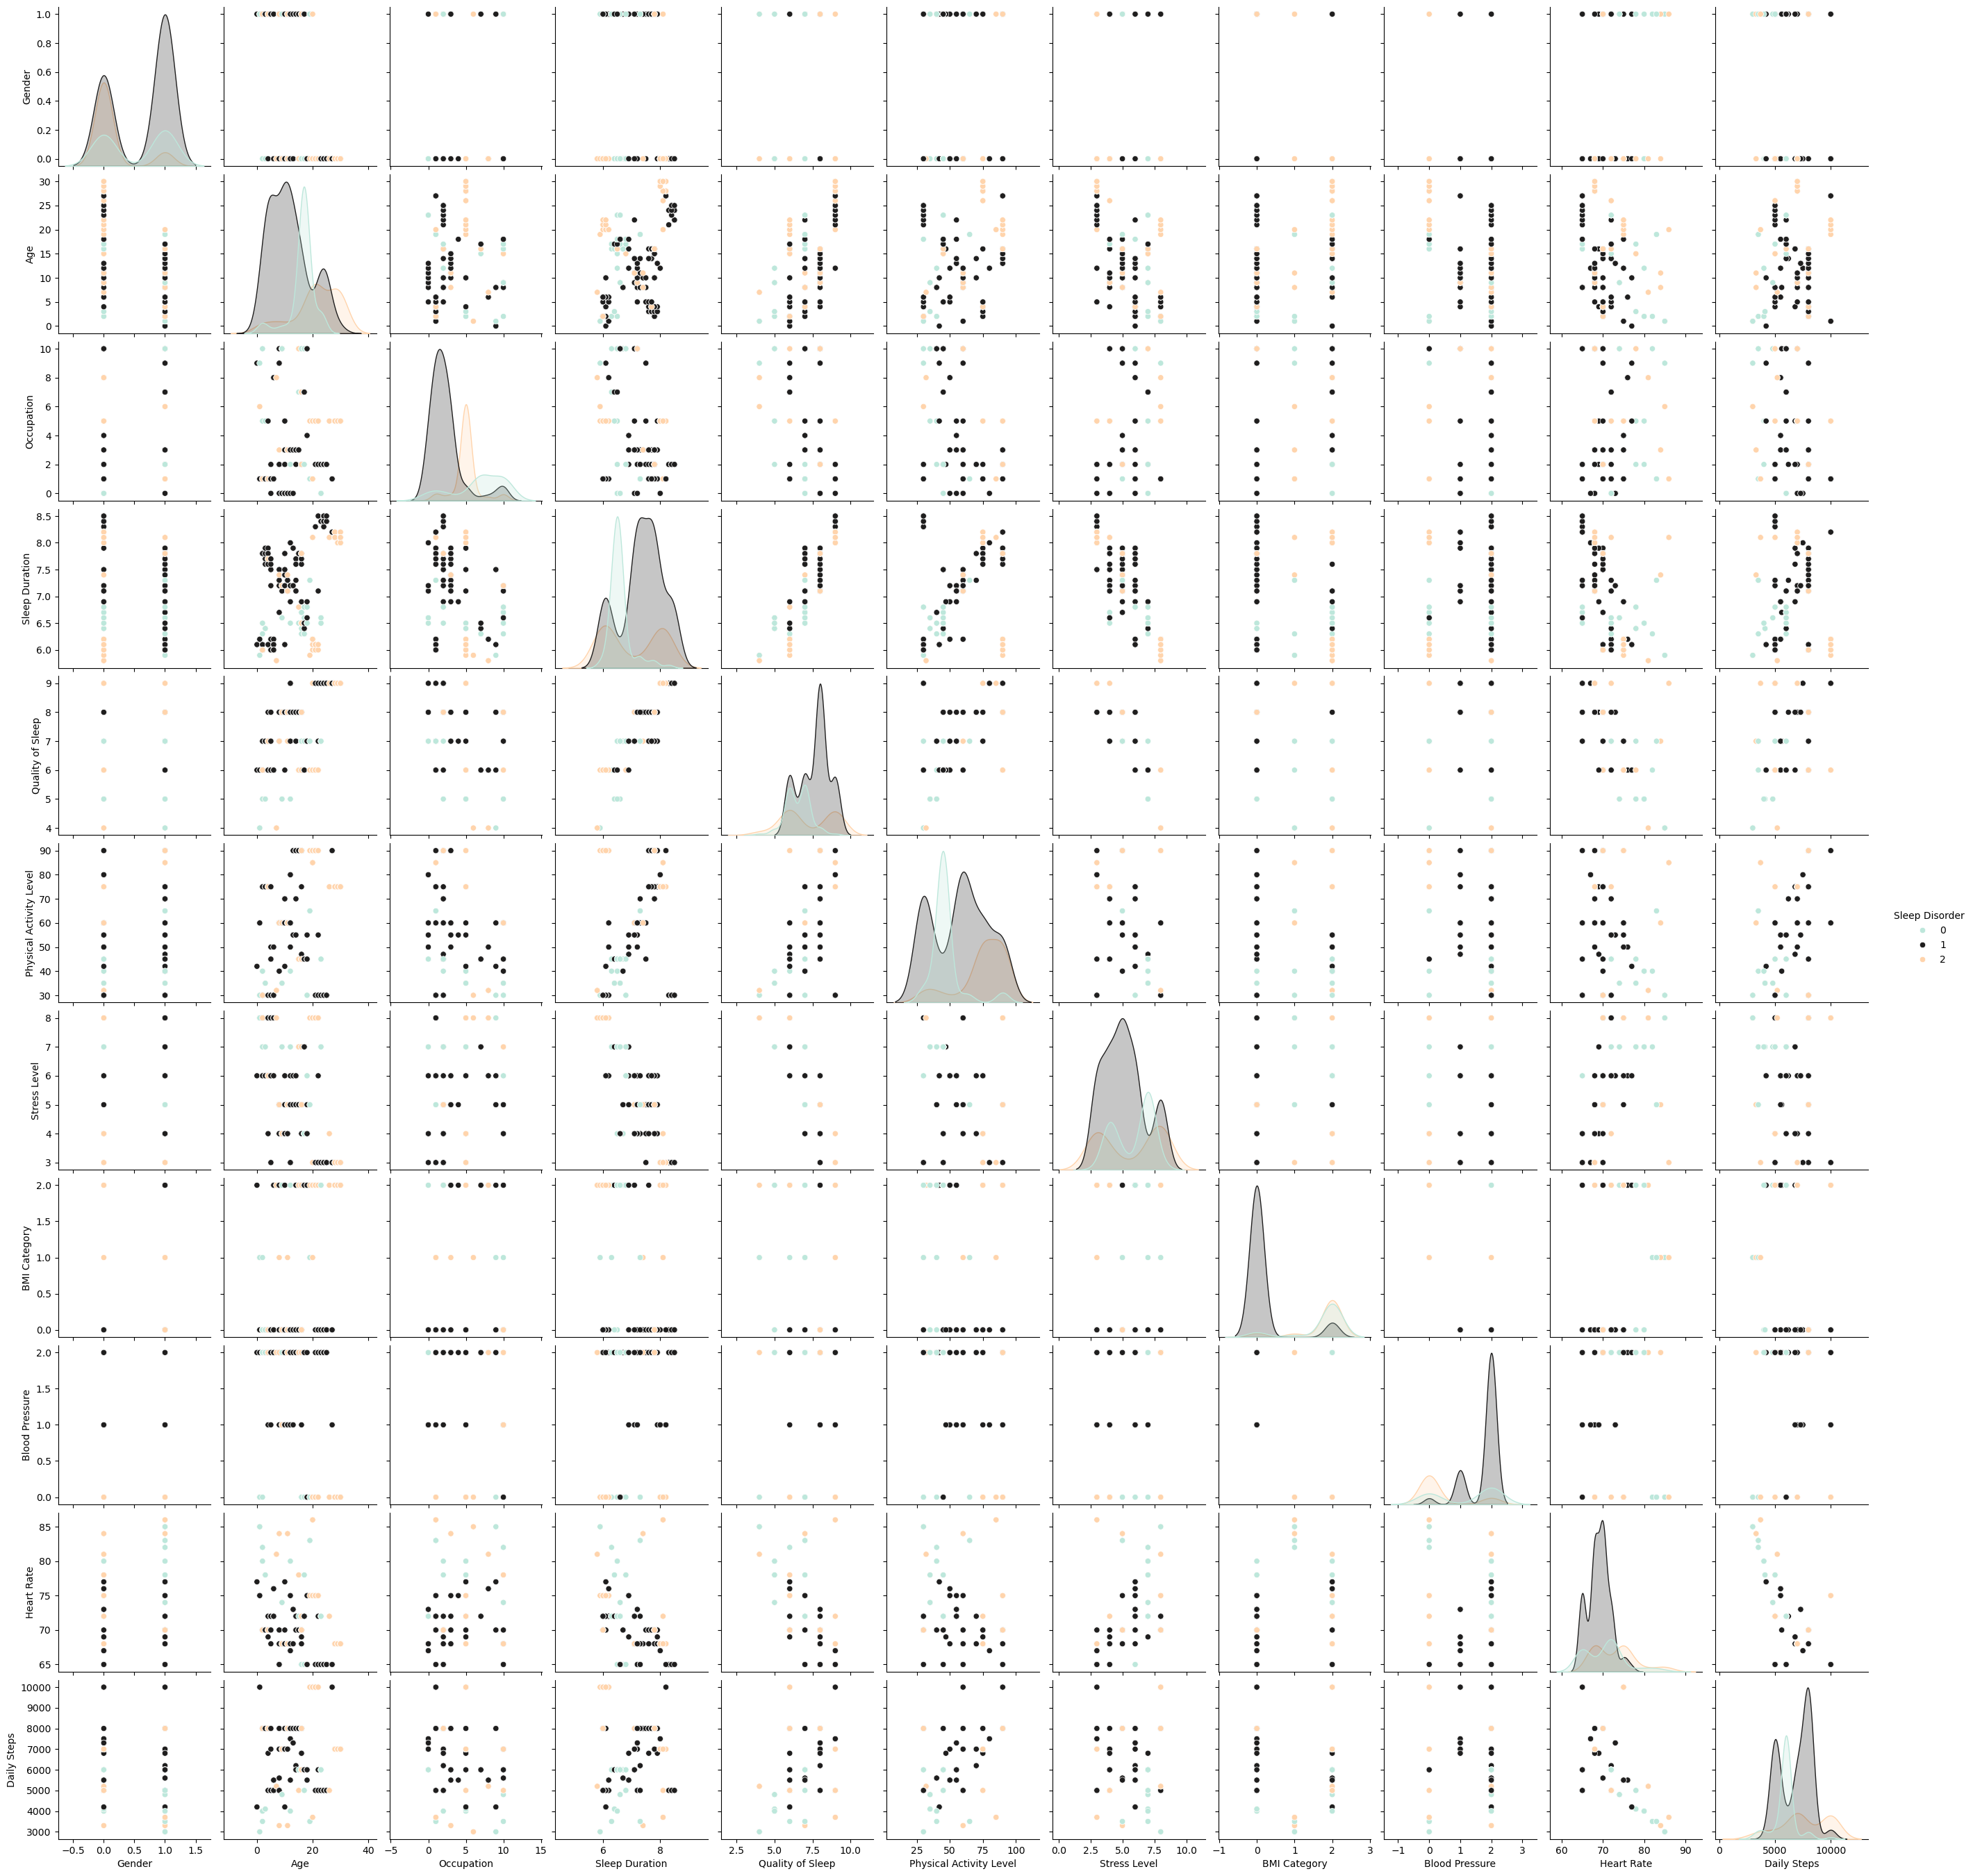

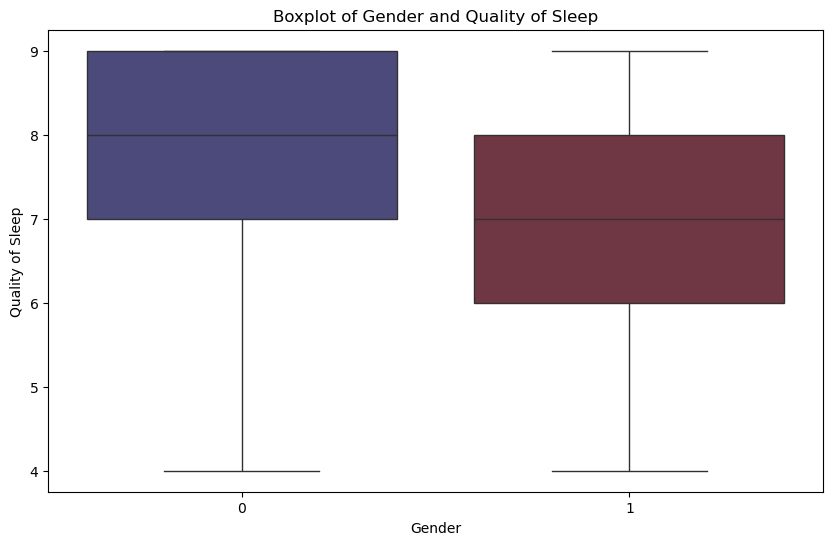

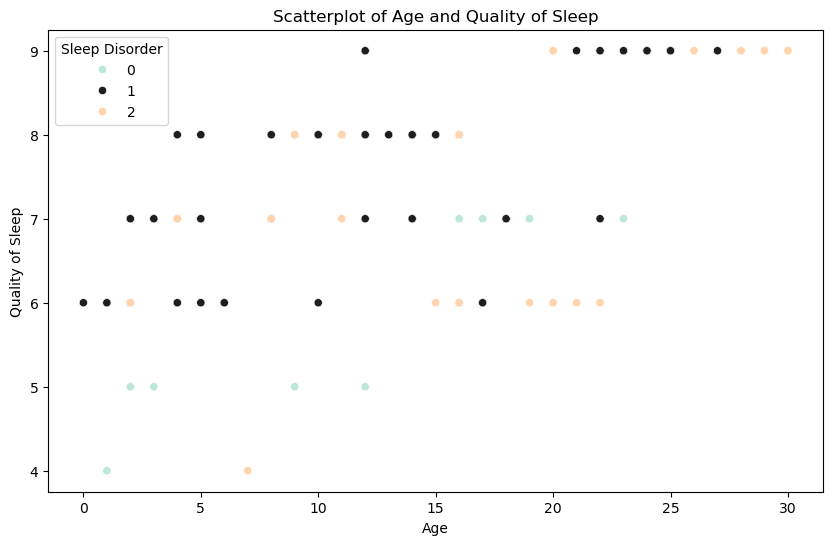

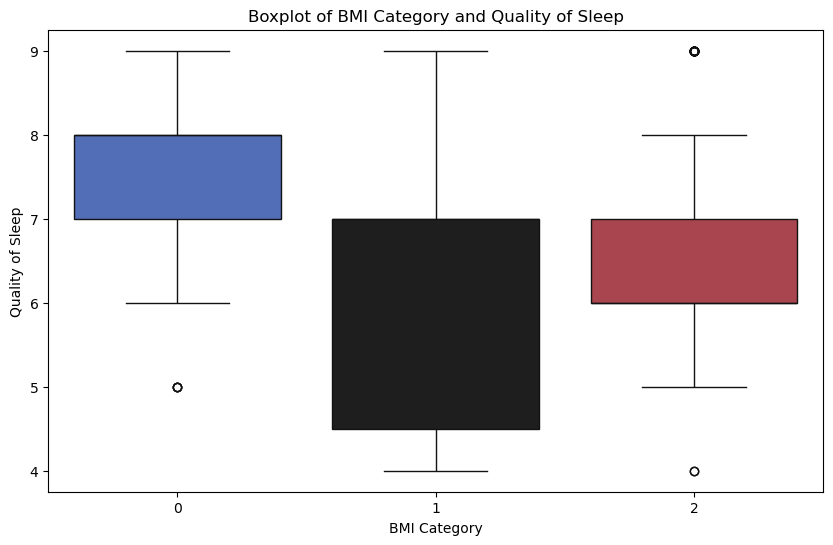

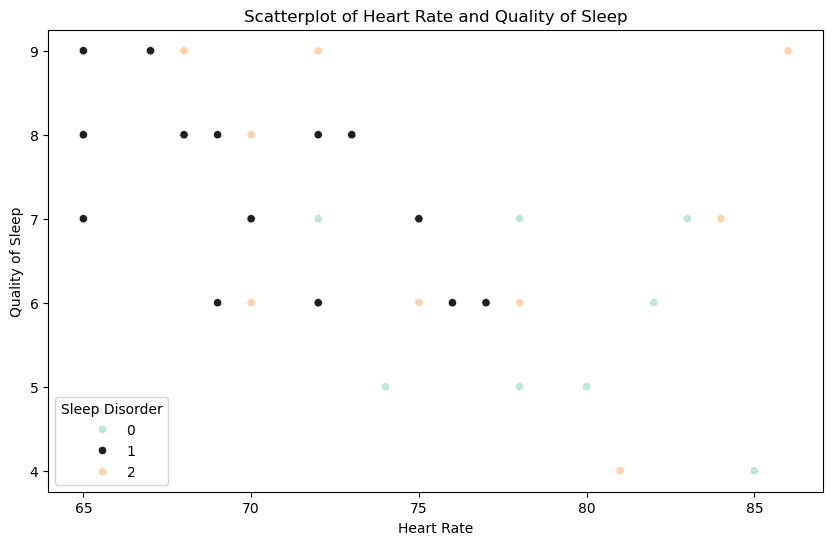

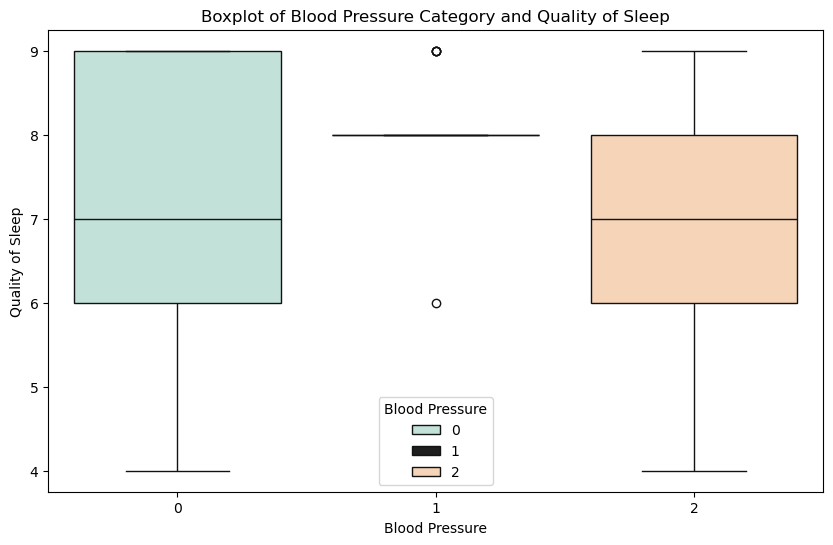

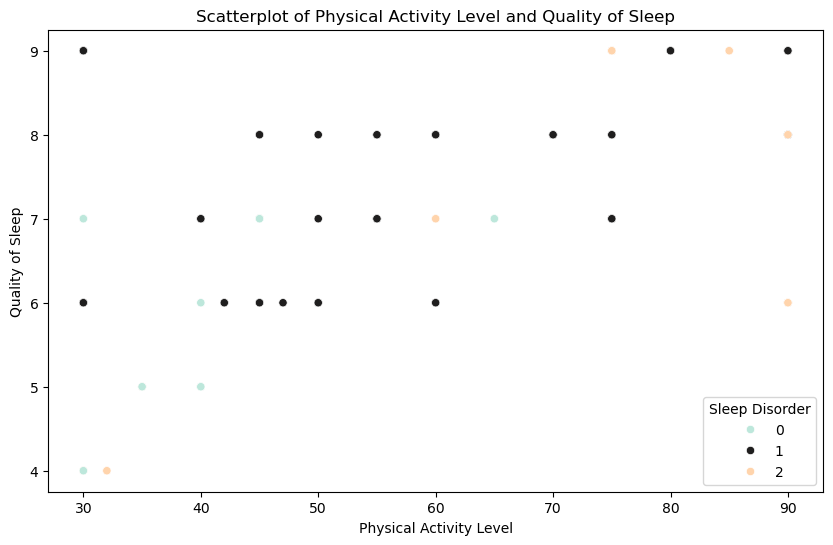

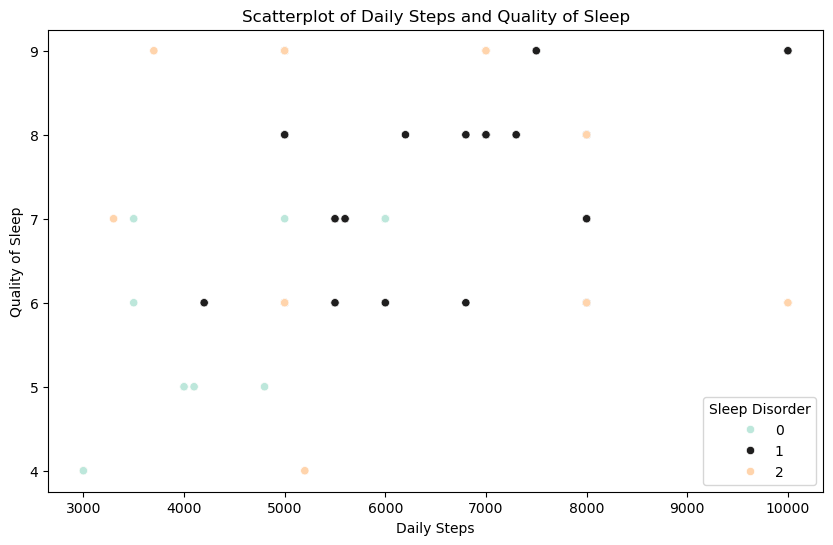

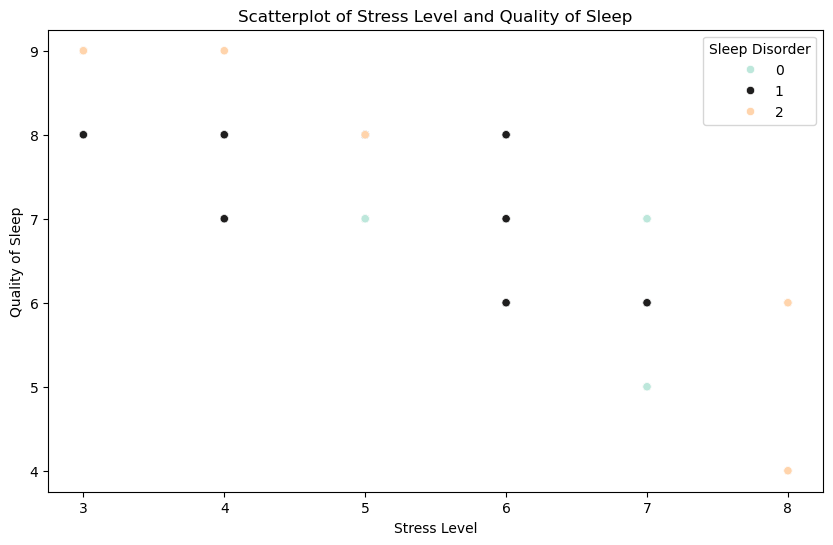

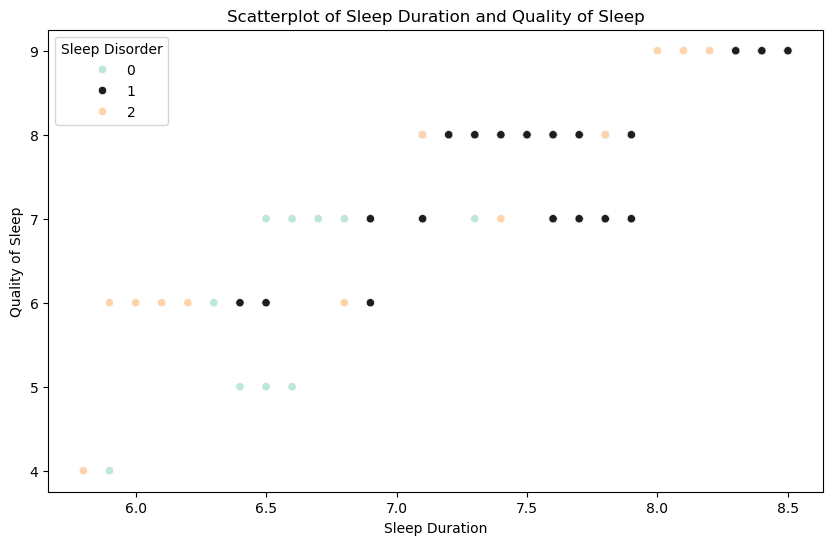

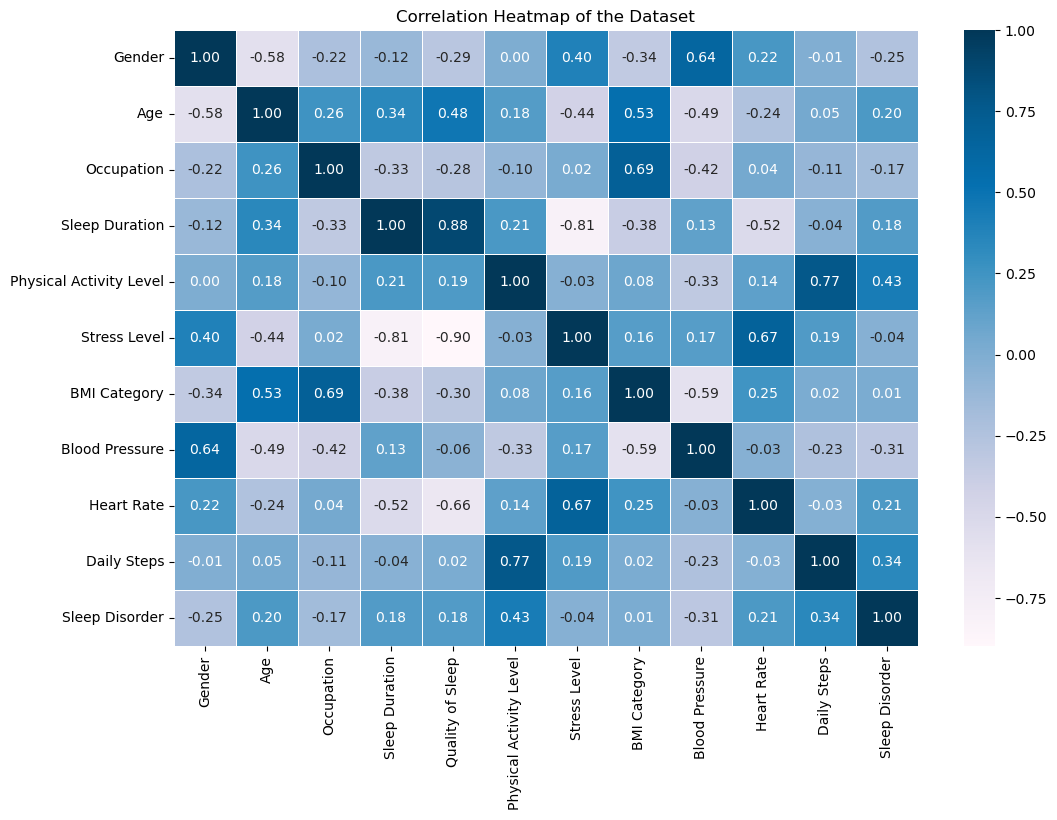

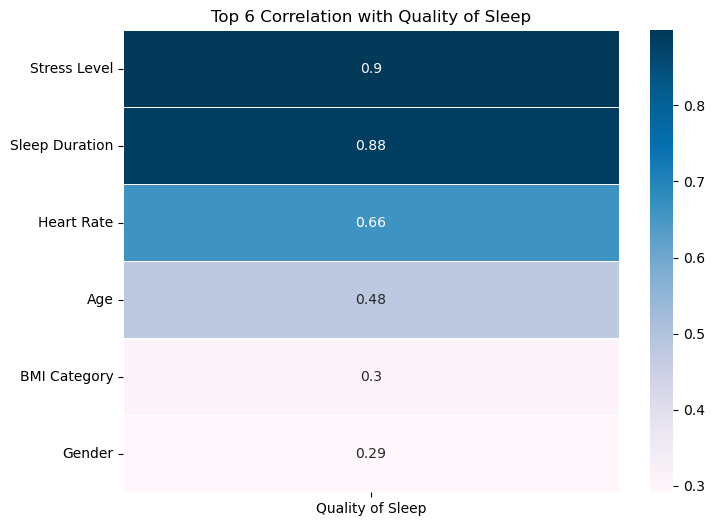

In [19]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# Save Pairplot
pairplot = sns.pairplot(data, hue='Sleep Disorder', palette='icefire')
pairplot.savefig('graphs/pairplot.png')

# Save Gender and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=data, palette='icefire')
plt.title('Boxplot of Gender and Quality of Sleep')
plt.savefig('graphs/gender_quality_sleep_boxplot.png')

# Save Age and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Age and Quality of Sleep')
plt.savefig('graphs/age_quality_sleep_scatterplot.png')

# Save BMI Category and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=data, palette='icefire')
plt.title('Boxplot of BMI Category and Quality of Sleep')
plt.savefig('graphs/bmi_quality_sleep_boxplot.png')

# Save Heart Rate vs Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Heart Rate and Quality of Sleep')
plt.savefig('graphs/heart_rate_quality_sleep_scatterplot.png')

# Save Blood Pressure Category and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blood Pressure', y='Quality of Sleep', data=data, palette='icefire', hue='Blood Pressure')
plt.title('Boxplot of Blood Pressure Category and Quality of Sleep')
plt.savefig('graphs/blood_pressure_quality_sleep_boxplot.png')

# Save Physical Activity Level and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Physical Activity Level and Quality of Sleep')
plt.savefig('graphs/physical_activity_quality_sleep_scatterplot.png')

# Save Daily Steps and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Daily Steps and Quality of Sleep')
plt.savefig('graphs/daily_steps_quality_sleep_scatterplot.png')

# Save Stress Level and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Stress Level and Quality of Sleep')
plt.savefig('graphs/stress_level_quality_sleep_scatterplot.png')

# Save Sleep Duration and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Sleep Duration and Quality of Sleep')
plt.savefig('graphs/sleep_duration_quality_sleep_scatterplot.png')

# Save Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='PuBu', linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.savefig('graphs/correlation_heatmap.png')

# Save Top 6 Correlation with Quality of Sleep Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(max_6_corr.to_frame(), annot=True, cmap='PuBu', linewidths=0.5)
plt.title('Top 6 Correlation with Quality of Sleep')
plt.savefig('graphs/top_6_correlation_quality_sleep.png')